In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
with open("processed_decomposed_dataset.jsonl", "r") as f:
    data_txt = [json.loads(x[:-2]) for x in f.readlines()]

In [3]:
data_txt[4]

{'query': 'I have a project where we deploy the "Vertex AI Vision SDK" into a container in Docker Desktop on the client computer on the edge and the sdk pushes the camera feed from the rtsp to Google Cloud\'s Vertex AI Vision and it goes through pre-trained human/vehicle model to find out count and that information is written into BigQuery in json format. This information will be queried and provided back to the customer in json response. \n\nI would like to identify the roundtrip time from the start of the stream to the json response. However the timestamp on the camera is off. It\'s hard to evaluate the roundtrip time. \n\nProvide me methodologies/ideas on how to accurately calculate the roundtrip time.',
 'output_a': 'To accurately calculate the roundtrip time for your Vertex AI Vision SDK container deployment, you can use the following methodologies:\n\n1. Add a timestamp to the camera feed: You can add a timestamp to the camera feed that is sent to Vertex AI Vision. This will allo

In [4]:
data_df = pd.DataFrame(data_txt)

In [5]:
data_df

,query,output_a,M_a_text,T_a_text,A_a_text,M_a_span,T_a_span,A_a_span,S_a,output_b,M_b_text,T_b_text,A_b_text,M_b_span,T_b_span,A_b_span,S_b,label,error
0,Define Signal Discuss its various properties w...,A signal is a form of energy that is used to t...,"Begins by interpreting the user's request, pro...",Transitions into a structured breakdown of sig...,A signal is a form of energy that is used to t...,"[0, 27]","[28, 102]","[0, 121]",Define and List Core Properties,A signal is a message that is conveyed from a ...,"Opens by interpreting the user's intent, defin...",Implements a systematic approach by listing an...,A signal is a message that is conveyed from a ...,"[0, 38]","[39, 180]","[0, 205]",Comprehensive List with Examples and Diagram R...,1,NaN
1,Please make a list of independent Fertility co...,"Sure, here are some independent Fertility coac...",Signals intent to fulfill the user's request a...,Implements the plan by presenting a numbered l...,1. Fertility Authority\n2. Fertility Solutions...,"[0, 18]","[19, 70]","[19, 70]",List Format with Placeholder Filling,"Sure, here is a list of independent Fertility ...",Acknowledges the request and frames the respon...,Executes by providing a numbered list of plaus...,1. Fertility Focus LLC\n2. Fertility Journey I...,"[0, 20]","[21, 99]","[21, 99]",List with Caveat and User Guidance,3,NaN
2,Explain various data mining functionalities wi...,Data mining is a process of discovering patter...,"Begins by interpreting the user's request, def...","Transitions into a structured list, systematic...",These are just a few examples of the many diff...,"[0, 27]","[28, 169]","[170, 239]","Define, List, and Exemplify",Data mining is the process of discovering patt...,Opens with a concise definition of data mining...,"Implements a detailed, itemized approach: for ...",These are just a few examples of the many data...,"[0, 20]","[21, 210]","[211, 282]","Define, Enumerate, and Contextualize",1,NaN
3,How do I change the short cut on mac osx to to...,To change the shortcut on Mac OS X to toggle t...,"Sets up a clear instructional intent, restatin...","Implements a detailed, sequential procedure wi...",That's it! Now you can use the key combination...,"[0, 18]","[19, 143]","[144, 159]",Stepwise Procedural Guide,To change the shortcut for toggling VoiceOver ...,Restates the user's goal and frames the respon...,"Presents a concise, ordered list of steps, inc...",Note: The default shortcut to toggle VoiceOver...,"[0, 16]","[17, 120]","[121, 135]",Concise Step List with Default Reference,0,NaN
4,"I have a project where we deploy the ""Vertex A...",To accurately calculate the roundtrip time for...,Restates the user's goal and frames the respon...,Organizes the answer as a numbered list of dis...,"By using one or more of these methodologies, y...","[0, 19]","[20, 120]","[121, 143]",List of Methods with Summary Conclusion,Here are some methodologies and ideas to accur...,Introduces the response as a direct answer to ...,"Presents a detailed, numbered list of methodol...","By implementing these methodologies, you can a...","[0, 18]","[19, 188]","[189, 211]",Comprehensive Tool-Based Method List,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,regarding the welsh language what does the Ll ...,The Ll is a phonetic symbol that represents th...,Begins by identifying 'Ll' as a phonetic symbo...,Describes the pronunciation by comparing it to...,It is a unique sound that does not exist in En...,"[0, 10]","[11, 38]","[39, 56]",Direct Explanation with Comparison,"In Welsh, the letter ""Ll"" is a digraph that re...",Introduces 'Ll' as a Welsh digraph and frames ...,"Explains how the sound is produced, provides e...","The ""Ll"" sound is an important part of the Wel...","[0, 22]","[23, 97]","[98, 136]",Detailed Explanation with Examples and Cultura...,2,NaN
942,Tell me about llave.io,Llave.io is a password manager that helps user...,Begins by identifying Llave.io as a password

In [6]:
data_df['label'].value_counts()

label
 0    247
 1    181
-1    140
 2    138
-2    111
-3     69
 3     60
Name: count, dtype: int64

In [9]:
data_df.drop(columns=['error'], axis=1, inplace=True)

In [10]:
data_df.dropna(inplace=True)

In [11]:
def MTA_span_analysis(row):
    out_a = row['output_a']
    len_a = len(out_a.split(" "))
    out_b = row['output_b']
    len_b = len(out_b.split(" "))

    M_a_start, M_a_end = row['M_a_span'] if len(row['M_a_span']) == 2 else (0, 0)
    T_a_start, T_a_end = row['T_a_span'] if len(row['T_a_span']) == 2 else (0, 0)
    A_a_start, A_a_end = row['A_a_span'] if len(row['A_a_span']) == 2 else (0, 0)

    M_b_start, M_b_end = row['M_b_span'] if len(row['M_b_span']) == 2 else (0, 0)
    T_b_start, T_b_end = row['T_b_span'] if len(row['T_b_span']) == 2 else (0, 0)
    A_b_start, A_b_end = row['A_b_span'] if len(row['A_b_span']) == 2 else (0, 0)

    row['len_a'] = len_a
    row['len_b'] = len_b

    row['start_M_a'] = M_a_start / len_a
    row['end_M_a'] = M_a_end / len_a

    row['start_T_a'] = T_a_start / len_a
    row['end_T_a'] = T_a_end / len_a

    row['start_A_a'] = A_a_start / len_a
    row['end_A_a'] = A_a_end / len_a

    row['start_M_b'] = M_b_start / len_b
    row['end_M_b'] = M_b_end / len_b

    row['start_T_b'] = T_b_start / len_b
    row['end_T_b'] = T_b_end / len_b

    row['start_A_b'] = A_b_start / len_b
    row['end_A_b'] = A_b_end / len_b
    return row


In [12]:
new_df = data_df.apply(MTA_span_analysis, axis=1)

In [13]:
new_df["len_a"].mean(), new_df["len_b"].mean()

(230.56673728813558, 255.29131355932202)

In [14]:
new_df['start_A_a'].mean(), new_df['end_A_a'].mean(), new_df['start_A_b'].mean(), new_df['end_A_b'].mean()

(0.44903208721455123,
 0.7109504367705174,
 0.473551821616154,
 0.7127565836925961)

In [15]:
new_df['start_M_a'].mean(), new_df['end_M_a'].mean(), new_df['start_M_b'].mean(), new_df['end_M_b'].mean()

(0.00012011187111490878,
 0.13061747243582447,
 0.000729802034977869,
 0.13531952847271028)

In [16]:
new_df['start_T_a'].mean(), new_df['end_T_a'].mean(), new_df['start_T_b'].mean(), new_df['end_T_b'].mean()

(0.12576151111396255,
 0.6252132443079669,
 0.13064081519855936,
 0.636061801545557)

In [17]:
S = pd.Series(list(new_df['S_a']) + list(new_df['S_b']))
M = pd.Series(list(new_df['M_a_text']) + list(new_df['M_b_text']))
T = pd.Series(list(new_df['T_a_text']) + list(new_df['T_b_text']))

In [18]:
S.value_counts()

Stepwise Instructional Guide                   10
Enumerate and Advise                            8
Stepwise Procedural Guide                       6
Enumerate and Explain                           6
Direct List Generation                          5
                                               ..
Persuasive Feature-Driven Pitch                 1
Direct Definition with Attribute Listing        1
List Libraries and Match to Platforms           1
Enumerate Possibilities, Note Insufficiency     1
Contrast and Resolution Poetic Arc              1
Name: count, Length: 1783, dtype: int64

In [19]:
M.value_counts()

Not explicitly present                                                                                                                             34
Expresses uncertainty about the user's intent and requests clarification before proceeding.                                                         2
Begins by interpreting the user's request, providing a general definition of 'signal' and establishing the context for further explanation.         1
Frames the answer by providing background on Area 51, highlighting secrecy, speculation, and the need for critical evaluation.                      1
Begins by explicitly stating the intent to break down the story structure into three main parts, setting up a clear and organized explanation.      1
                                                                                                                                                   ..
Acknowledges the user's request and sets up the roleplay scenario, indicating readiness to proceed a

In [20]:
T.value_counts()

Not explicitly present                                                                                                                                                                                                                                                   19
Asks a clarifying question to gather more information before proceeding.                                                                                                                                                                                                  2
Transitions into a structured breakdown of signal properties, listing and defining amplitude, frequency, and phase, and then explains how a diagram (waveform) can represent these properties.                                                                            1
It provides a detailed, stepwise summary of the study design, endpoints, and key results, including statistics and definitions.                                                                     

In [21]:
M = M[M!="Not explicitly present"]
T = T[T!="Not explicitly present"]

In [22]:
M.isna().sum(), T.isna().sum()

(0, 0)

In [30]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')  # strong general-purpose model

embeddings_M = model.encode(list(M), normalize_embeddings=True)
embeddings_T = model.encode(list(T), normalize_embeddings=True)
embeddings_S = model.encode(list(S), normalize_embeddings=True)

c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [31]:
import hdbscan
clustererM = hdbscan.HDBSCAN(min_cluster_size=3, cluster_selection_method='eom', prediction_data=True)
clustererT = hdbscan.HDBSCAN(min_cluster_size=3, cluster_selection_method='eom', prediction_data=True)
clustererS = hdbscan.HDBSCAN(min_cluster_size=3, cluster_selection_method='eom', prediction_data=True)
labels_m = clustererM.fit_predict(embeddings_M)
labels_t = clustererT.fit_predict(embeddings_T)
labels_s = clustererS.fit_predict(embeddings_S)


c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\d

In [26]:
from collections import defaultdict

cluster_dict = defaultdict(list)
for i, label in enumerate(labels_m):
    cluster_dict[label].append(list(M)[i])

# Print samples
for cluster_id, samples in cluster_dict.items():
    print(f"\n--- Cluster {cluster_id} ---")
    for s in samples[:5]:  # limit print size
        print(s)



--- Cluster 1 ---
Begins by interpreting the user's request, providing a general definition of 'signal' and establishing the context for further explanation.
Signals intent to fulfill the user's request and frames the response as a list, indicating understanding of the instruction.
Begins by interpreting the user's request, defining data mining, and setting a context for the explanation.
Sets up a clear instructional intent, restating the user's goal and signaling a step-by-step approach.
Restates the user's goal and frames the response as a set of methodologies to address the problem, indicating an intent to provide actionable solutions.

--- Cluster -1 ---
Acknowledges the request and frames the response as a list of five writing prompts, directly referencing the novel and story.
Affirms knowledge and frames the response by situating the framework within the broader context of storytelling archetypes and its historical use.
Begins by directly classifying the wallet type, showing con

In [27]:
cluster_dict = defaultdict(list)
for i, label in enumerate(labels_t):
    cluster_dict[label].append(list(T)[i])

# Print samples
for cluster_id, samples in cluster_dict.items():
    print(f"\n--- Cluster {cluster_id} ---")
    for s in samples[:5]:  # limit print size
        print(s)



--- Cluster 0 ---
Transitions into a structured breakdown of signal properties, listing and defining amplitude, frequency, and phase, and then explains how a diagram (waveform) can represent these properties.
Implements the plan by presenting a numbered list format, but after a few unique entries, repeats a generic placeholder name to fill out the list.
Transitions into a structured list, systematically naming and describing each functionality, and providing an example for each.
Implements a detailed, sequential procedure with numbered steps, guiding the user through the system menus and actions required to change the shortcut.
Organizes the answer as a numbered list of distinct methodologies, each briefly described, to systematically address the roundtrip time measurement challenge.

--- Cluster -1 ---
Breaks down the abstract into sequential, simplified explanations: describes the specific metamaterial, explains how it works, details the experiment and its results, and discusses pot

In [32]:
cluster_dict = defaultdict(list)
for i, label in enumerate(labels_s):
    cluster_dict[label].append(list(S)[i])

# Print samples
for cluster_id, samples in cluster_dict.items():
    print(f"\n--- Cluster {cluster_id} ---")
    for s in samples[:5]:  # limit print size
        print(s)



--- Cluster -1 ---
Define and List Core Properties
List Format with Placeholder Filling
Define, List, and Exemplify
List of Methods with Summary Conclusion
Direct List with Embedded Analysis Prompts

--- Cluster 44 ---
Stepwise Procedural Guide
Stepwise Procedural Guide
Stepwise Procedural Guide
Stepwise Procedural Guide
Stepwise Procedural Guidance

--- Cluster 14 ---
Prompt Generation and Reframing
Direct Structured Prompt Generation
Diverse Prompt Generation
Stepwise Greeting and Prompt
Open-Ended Prompt

--- Cluster 21 ---
Ethical Refusal with Alternative Offer
Ethical Framing and Justification
Ethical Framing and Safeguard Emphasis
Ethical Refusal with Professional Framing
Ethical Refusal

--- Cluster 55 ---
Stepwise Instructional Guide
Stepwise Instructional Guide
Stepwise Guided Tutorial
Stepwise Instructional Guide
Intro and Detailed Stepwise Guide

--- Cluster 43 ---
Hierarchical Stepwise Planning
Comprehensive Stepwise Planning
Stepwise Action Plan
Structured Stepwise Planni

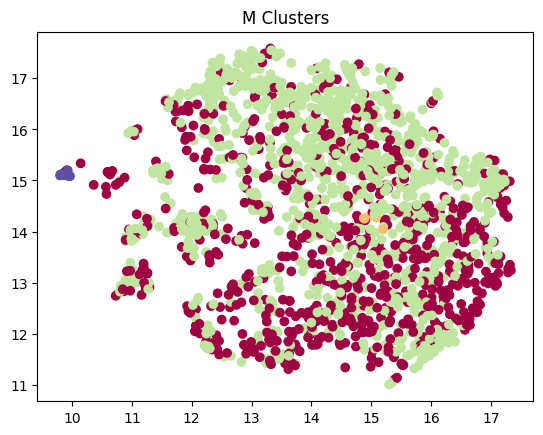

In [28]:
import umap
import matplotlib.pyplot as plt

umap_embeddings = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine').fit_transform(embeddings_M)

plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=labels_m, cmap='Spectral')
plt.title("M Clusters")
plt.show()


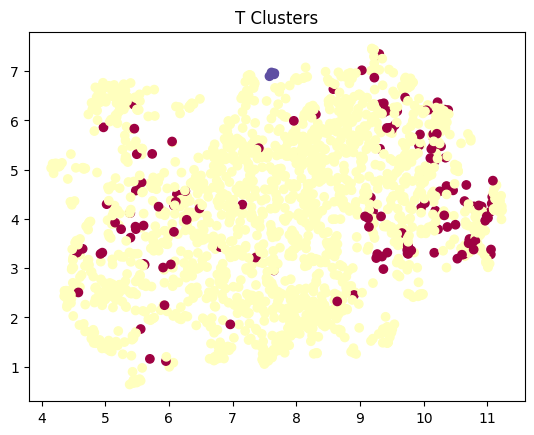

In [29]:
umap_embeddings = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine').fit_transform(embeddings_T)

plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=labels_t, cmap='Spectral')
plt.title("T Clusters")
plt.show()

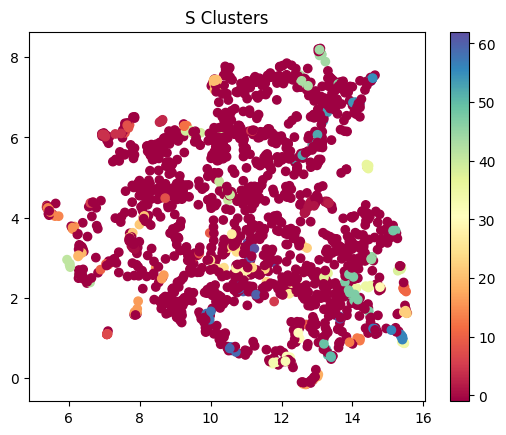

In [39]:
umap_embeddings = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine').fit_transform(embeddings_S)

plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=labels_s, cmap='Spectral')
plt.title("S Clusters")
plt.colorbar()
plt.show()